<a href="https://colab.research.google.com/github/RasonYudha4/AI-Subject/blob/main/Assigmnent3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7


**K Means**

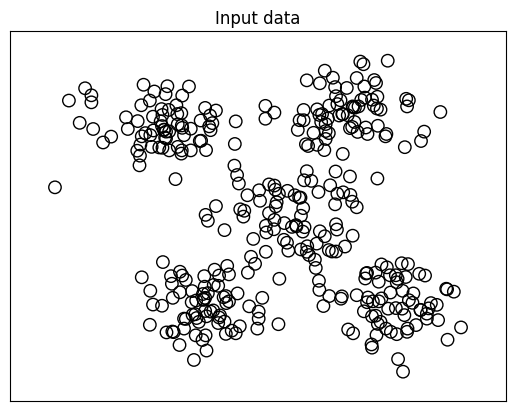

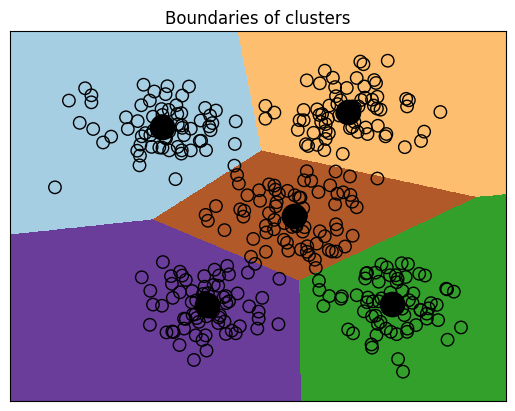

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=210, linewidths=4, color='black',
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**Mean Shift**


Centers of clusters:
 [[4.84895288 3.05722513]
 [4.33050847 7.33576271]]

Number of clusters in input data = 2


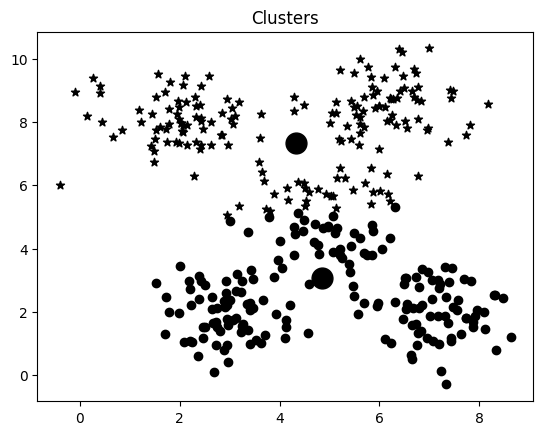

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Load data from input file
X = np.loadtxt('data_clustering.txt', delimiter=',')

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift()
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='black', markeredgecolor='black',
            markersize=15)

plt.title('Clusters')
plt.show()

**Clustering Quality**


Number of clusters = 2
Silhouette score = 0.4776262487045446

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.5794801889687591

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5542025064538287

Number of clusters = 8
Silhouette score = 0.5284895754420955

Number of clusters = 9
Silhouette score = 0.4451666210687673

Optimal number of clusters = 6


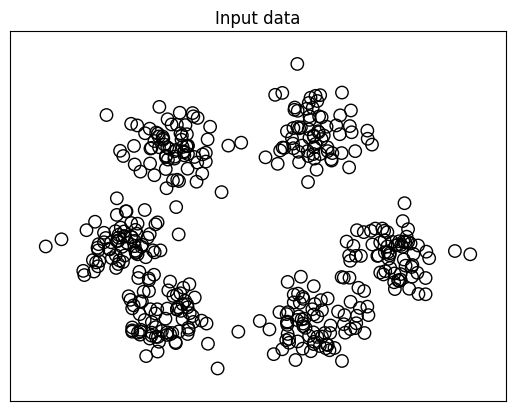

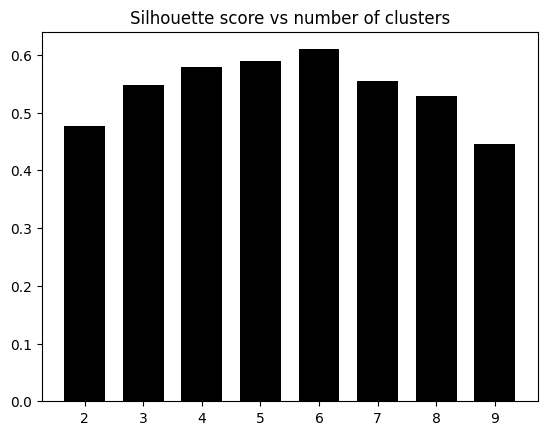

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data from input file
X = np.loadtxt('data_quality.txt', delimiter=',')

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_,
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)

    scores.append(score)

# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

**GMM Classifier**

Accuracy on training data = 7.777777777777778
Accuracy on testing data = 18.333333333333332


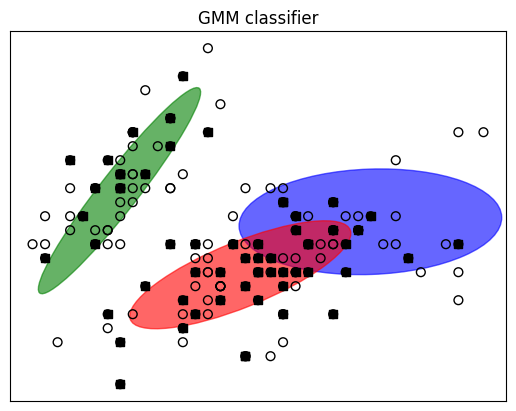

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()

X, y = datasets.load_iris(return_X_y=True)

# Split dataset into training and testing (80/20 split)
skf = StratifiedKFold(n_splits=5) #
skf.get_n_splits(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Extract the number of classes
num_classes = len(np.unique(y_train))

# Build GMM
classifier = GaussianMixture(n_components=num_classes, covariance_type='full',
        init_params='kmeans', max_iter=20)

# Initialize the GMM means
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)
                              for i in range(num_classes)])

# Train the GMM classifier
classifier.fit(X_train)

# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier.covariances_[i][:2, :2])

    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor

    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2],
                           eigenvalues[0],
                           eigenvalues[1],
                           angle=180 + angle,  # Pass angle as a keyword argument
                           color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

# Plot the data
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',
            facecolors='none', edgecolors='black', s=40, label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s',
            facecolors='black', edgecolors='black', s=40 ,label=iris.target_names[i])

# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)

y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

plt.show()

**Market Segmentation**


Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


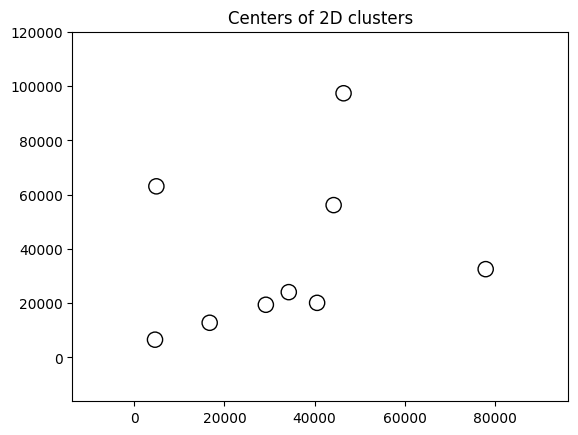

In [ ]:
import csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load data from input file
input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue

    X.append([float(x) for x in row[1:]])

# Convert to numpy array
X = np.array(X)

# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

print("\nNumber of clusters in input data =", num_clusters)

print("\nCenters of clusters:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))

# Extract two features for visualization
cluster_centers_2d = cluster_centers[:, 1:3]

# Plot the cluster centers
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1],
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()

# Chapter 8


**K Nearest Neighbors**


K Nearest Neighbors:
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


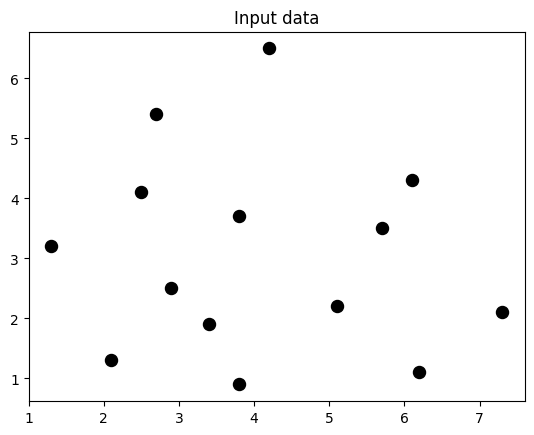

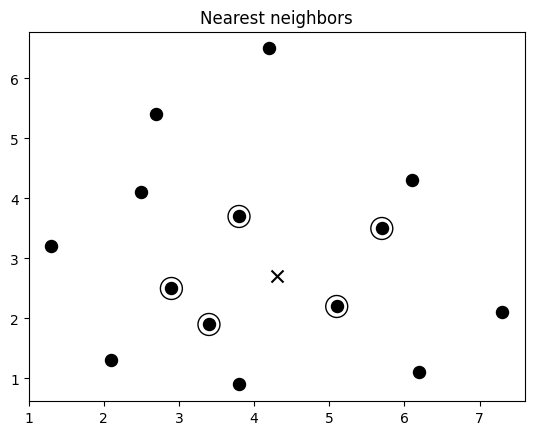

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Input data
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

# Number of nearest neighbors
k = 5

# Test datapoint
test_datapoint = [4.3, 2.7]

# Plot input data
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

# Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])

# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])

# Visualize the nearest neighbors along with the test datapoint
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],
        marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],
        marker='x', s=75, color='k')

plt.show()

**Nearest Neighbors Classifier**

Predicted output: 1


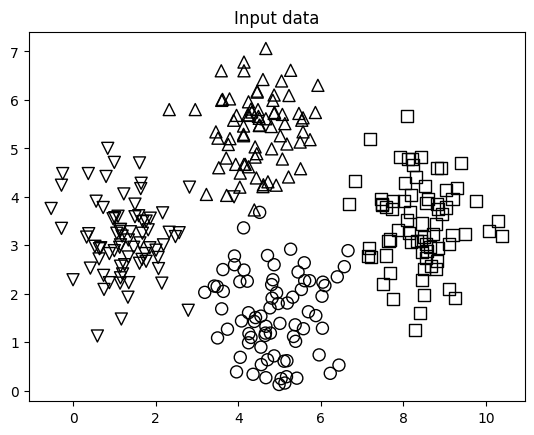

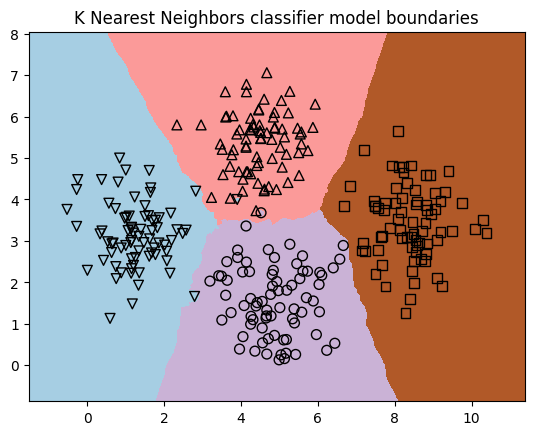

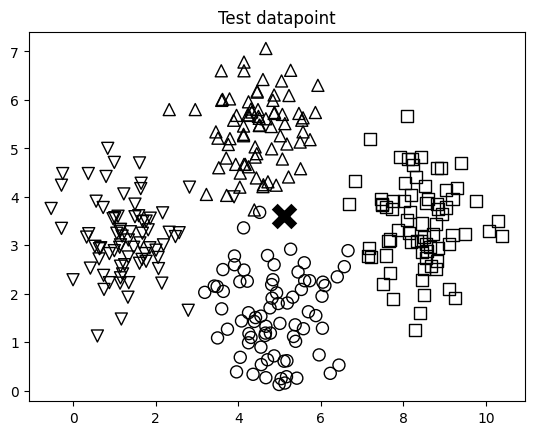

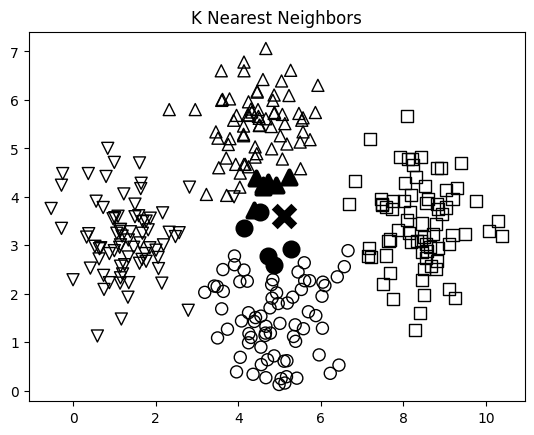

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

# Load input data
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

# Number of nearest neighbors
num_neighbors = 12

# Step size of the visualization grid
step_size = 0.01

# Create a K Nearest Neighbours classifier model
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Train the K Nearest Neighbours model
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

# Evaluate the classifier on all the points on the grid
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x',
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]],
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x',
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()


**Compute Scores**

In [8]:
import argparse
import json
import numpy as np

In [9]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compute similarity score')
    parser.add_argument('--user1', dest='user1', required=True,
            help='First user')
    parser.add_argument('--user2', dest='user2', required=True,
            help='Second user')
    parser.add_argument("--score-type", dest="score_type", required=True,
            choices=['Euclidean', 'Pearson'], help='Similarity metric to be used')
    return parser

In [10]:
# Compute the Euclidean distance score between user1 and user2
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    # If there are no common movies between the users,
    # then the score is 0
    if len(common_movies) == 0:
        return 0

    squared_diff = []

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))

    return 1 / (1 + np.sqrt(np.sum(squared_diff)))

In [11]:
# Compute the Pearson correlation score between user1 and user2
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # If there are no common movies between user1 and user2, then the score is 0
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

**Movie Recomendations**

In [2]:
import argparse
import json
import numpy as np

In [3]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Find the movie recommendations for the given user')
    parser.add_argument('--user', dest='user', required=True,
            help='Input user')
    return parser

In [4]:
def pearson_score(dataset, user1, user2):
    # Find movies rated by both users
    common_movies = [movie for movie in dataset[user1] if movie in dataset[user2]]

    # If no common movies, similarity score is 0
    if len(common_movies) == 0:
        return 0

    # Calculate ratings for common movies
    ratings1 = np.array([dataset[user1][movie] for movie in common_movies])
    ratings2 = np.array([dataset[user2][movie] for movie in common_movies])

    # Calculate Pearson correlation score
    mean_rating1 = np.mean(ratings1)
    mean_rating2 = np.mean(ratings2)

    numerator = np.sum((ratings1 - mean_rating1) * (ratings2 - mean_rating2))
    denominator = np.sqrt(np.sum((ratings1 - mean_rating1) ** 2)) * np.sqrt(np.sum((ratings2 - mean_rating2) ** 2))

    if denominator == 0:
        return 0

    return numerator / denominator

In [5]:
def find_similar_users(dataset, input_user, num_users=3):
    scores = [(other, pearson_score(dataset, input_user, other)) for other in dataset if other != input_user]
    # Sort users by score in descending order
    scores.sort(key=lambda x: x[1], reverse=True)
    return [user for user, score in scores[:num_users]]

In [6]:
# Get movie recommendations for the input user
def get_recommendations(dataset, input_user):
    if input_user not in dataset:
        raise TypeError('Cannot find ' + input_user + ' in the dataset')

    overall_scores = {}
    similarity_scores = {}

    for user in [x for x in dataset if x != input_user]:
        similarity_score = pearson_score(dataset, input_user, user)

        if similarity_score <= 0:
            continue

        filtered_list = [x for x in dataset[user] if x not in \
                dataset[input_user] or dataset[input_user][x] == 0]

        for item in filtered_list:
            overall_scores.update({item: dataset[user][item] * similarity_score})
            similarity_scores.update({item: similarity_score})

    if len(overall_scores) == 0:
        return ['No recommendations possible']

    # Generate movie ranks by normalization
    movie_scores = np.array([[score/similarity_scores[item], item]
            for item, score in overall_scores.items()])

    # Sort in decreasing order
    movie_scores = movie_scores[np.argsort(movie_scores[:, 0])[::-1]]

    # Extract the movie recommendations
    movie_recommendations = [movie for _, movie in movie_scores]

    return movie_recommendations

In [14]:
user = 'Chris Duncan'

# Load the dataset from ratings.json
ratings_file = 'ratings.json'
with open(ratings_file, 'r') as f:
    data = json.load(f)

# Get recommendations
print("\nMovie recommendations for " + user + ":")
movies = get_recommendations(data, user)
for i, movie in enumerate(movies):
    print(str(i+1) + '. ' + movie)


Movie recommendations for Chris Duncan:
1. Vertigo
2. Scarface
3. Goodfellas
4. Roman Holiday
